# <span style="color:red">Rule inference with scBONITA</span>

## _Please refer to the README file for installation and setup instructions_

## <span style="color:blue">Step 1: Set up the scBONITA pipeline.</span>
scBONITA needs a training dataset in matrix-style forma; this is usually a tab or comma-delimited file with columns as cells and rows as features. The first column should be feature names and the first row should be cell IDs. The units of the expression data will typically be a variant of log2(TPM +1).



### The setup pipeline has the following parameters:

1. dataFile: Specify the name of the file containing processed scRNA-seq data
1. fullPipeline Should scBonita set up the entire pipeline, starting with generation of network topologies? Accepts values 0 or 1
1. network File name of the network for which rules are to be inferred
1. maxNodes Number of genes in the dataset
1. maxSamples Number of cells in the dataset
1. separator Delimiting character in dataFile. Must be one of , (comma), \s (space) or \t (tab)
1. getKEGGPathways Should scBonita automatically identify and download KEGG pathways with genes that are in your dataset? You can specify which pathways using the 
1. listOfKEGGPathways option, or leave it blank to download all matching KEGG pathways
1. listOfKEGGPathways Which KEGG pathways should scBonita download? Specify the five letter pathway IDs.
1. organism Three-letter organism code. Which organism is the dataset derived from?
1. cvThreshold: Minimum coefficient of variation to retain genes for scBONITA analysis



### The following command runs scBONITA setup for a 20000*10000 comma-separated data set "example.csv". It downloads the KEGG pathways hsa00010 and hsa00020 for rule inference.

`python3.6 pipeline.py --dataFile "example.csv" --fullPipeline 1 --maxNodes 20000 --maxSamples 10000 --separator "," --listOfKEGGPathways "00010" "00020" --getKEGGPathways 1 --organism hsa cvThreshold None`

## <span style="color:blue">Step 2A: Rule inference and calculation of node importance score for the networks specified in Step 1 (setup).</span>

#### Step 1 generates sbatch files that enter the specified slurm queue. In a typical use case, these jobs should execute automatically. We recommend that users periodically check the slurm queue and the log files.

## <span style="color:blue">Step 2B: Analysis of the output of scBONITA rule inference</span>

### Description of output files (for an example network 'hsa00010.graphml')

* **hsa00010_processed.graphml_out2.pickle**

    Representation of the model returned by the genetic algorithm component of scBONITA-RD
    

* **hsa00010_processed.graphml_rules_GA.txt**

    Plain-text representation of the model inferred by the genetic algorithm/global search component of scBONITA-rule determination


* **hsa00010_processed.graphml_rules_LS.txt**

    Plain-text representation of a randomly sampled set of rules from the equivalent rule set returned by the local search component of scBONITA-rule determination


* **hsa00010_processed.graphml_localErrors1.pickle**

    Values of the optimization function ("errors") associated with the ERS returned by the local search.


* **hsa00010_processed.graphml_bruteout2.pickle**

    Representation of the model returned by the local search component of scBONITA-RD


* **hsa00010_processed.graphml_equivs1.pickle**

    Equivalent rule set returned by the local search component of scBONITA-RD
    

### Load required pacakges

In [1]:
import pickle, os, os.path
from pathlib import Path
import networkx as nx
import glob
import pandas as pd

### Unpack pickle objects

#### *_out2.pickle: Representation of the model returned by the genetic algorithm component of scBONITA-RD

#### *_equivs1.pickle : Equivalent rule set returned by the local search component of scBONITA-RD

In [2]:
currentDir = os.path.dirname(os.path.abspath("Rule_Inference_With_ScBONITA.ipynb"))
equivsName = os.path.join(currentDir, 'data','hsa00010_processed.graphml_equivs1.pickle')
print(equivsName)
ERS=pickle.load(open(equivsName, "rb"))
print(ERS)

/gpfs/fs2/scratch/mpalshik/scBONITA-main/scBonita_package/src/scBONITA/data/hsa00010_processed.graphml_equivs1.pickle
[[[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 1, 0, 0], [1, 1, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0], [1, 1, 0, 1, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0], [1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0], [0, 1, 1, 0, 0, 1, 0], [1, 1,

### Print out plain-text rules

In [3]:
equivsName = os.path.join(currentDir, 'data','hsa00010_processed.graphml_equivs1.pickle')
allscData = os.path.join(currentDir, 'data','trainingData.csvscTest.pickle')
print(allscData)
allscData = pickle.load(open(allscData, "rb"))
allscData.pathwayGraphs

/gpfs/fs2/scratch/mpalshik/scBONITA-main/scBonita_package/src/scBONITA/data/trainingData.csvscTest.pickle


{'hsa00010': <networkx.classes.digraph.DiGraph at 0x2b0bfa832970>}

In [4]:
os.chdir(os.path.join(currentDir, 'data'))
temp = allscData.ProcessLocalSearchOutput(graph = allscData.pathwayGraphs["hsa00010"], graphName = "hsa00010.graphml")

hsa00010.graphml hsa00010.graphml_processed.graphml_equivs1.pickle
Nodelist: ['DLAT', 'GALM', 'DLD', 'BPGM', 'MINPP1', 'AKR1A1', 'TPI1', 'GPI', 'ADPGK', 'ALDH9A1', 'AHR', 'PDHB', 'GAPDH', 'PGM2', 'MDH1', 'MDH2', 'POR', 'ALDOA', 'ALDOC', 'ALDH2', 'ALDH1B1', 'ALDH3A2', 'ALDH3B1', 'ADH5', 'PDHA1', 'LDHA', 'LDHB', 'LDHC', 'PKM', 'ENO1', 'ENO2', 'ENO3', 'PGAM1', 'PFKL', 'PFKM', 'PFKP', 'FBP1', 'PGM1', 'HK1', 'HK2', 'HK3', 'HKDC1', 'G6PC3', 'PGK1', 'PCK2', 'ACSS2', 'ACSS1']


/software/anaconda3/2020.07/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/software/anaconda3/2020.07/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/software/anaconda3/2020.07/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/software/anaconda3/2020.07/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/software/anaconda3/2020.07/lib/python3.8/site-packages/scipy/st


Individual parse: [0, 7, 14, 21, 28, 31, 38, 41, 48, 49, 52, 53, 53, 60, 63, 64, 65, 68, 69, 70, 73, 76, 79, 82, 89, 89, 92, 95, 98, 105, 112, 119, 126, 133, 136, 139, 142, 145, 148, 155, 162, 169, 176, 183, 190, 190, 190, 190]

Nodelist: ['DLAT', 'GALM', 'DLD', 'BPGM', 'MINPP1', 'AKR1A1', 'TPI1', 'GPI', 'ADPGK', 'ALDH9A1', 'AHR', 'PDHB', 'GAPDH', 'PGM2', 'MDH1', 'MDH2', 'POR', 'ALDOA', 'ALDOC', 'ALDH2', 'ALDH1B1', 'ALDH3A2', 'ALDH3B1', 'ADH5', 'PDHA1', 'LDHA', 'LDHB', 'LDHC', 'PKM', 'ENO1', 'ENO2', 'ENO3', 'PGAM1', 'PFKL', 'PFKM', 'PFKP', 'FBP1', 'PGM1', 'HK1', 'HK2', 'HK3', 'HKDC1', 'G6PC3', 'PGK1', 'PCK2', 'ACSS2', 'ACSS1']

Node positions: [30, 21, 33, 14, 42, 28, 4, 34, 32, 16, 40, 45, 46, 8, 3, 20, 18, 25, 26, 23, 24, 12, 19, 22, 44, 38, 41, 39, 29, 36, 6, 43, 17, 5, 27, 35, 11, 13, 10, 37, 0, 9, 7, 15, 1, 2, 31]

PossibilityList: [[11, 24, 45, 46], [38, 39, 40, 41], [0, 11, 24], [12, 29, 30, 31, 43], [3, 32], [9, 19, 20, 21, 22], [17, 18], [8, 13, 33, 34, 35, 36, 37, 38, 39, 40

Index(['Node', 'In_degree', 'Out_degree', 'Equivs_len', 'Graph',
       'Number_of_Nodes', 'importanceScore', 'AvgLocalError', 'plainEquivs',
       'bitstringEquivs', 'minimalRules'],
      dtype='object')

In [5]:
temp.head()

,Node,In_degree,Out_degree,Equivs_len,Graph,Number_of_Nodes,importanceScore,AvgLocalError,plainEquivs,bitstringEquivs,minimalRules
0,DLAT,4,2,127,hsa00010.graphml,47,0.003994,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","{DLAT *= (ACSS1 and ACSS2), DLAT *= (ACSS1), D...","{(0, 1, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 1),...",DLAT *= (PDHA1) or (ACSS1) or (ACSS2)
1,GALM,4,6,31,hsa00010.graphml,47,0.881890,"[1, 1, 1, 1, 1, 1, 1, 12, 12, 12, 12, 12, 12, ...","{GALM *= (HK1 and HKDC1) or (HK3 and HK1), GAL...","{(0, 1, 1, 0, 0, 0, 0), (0, 1, 0, 0, 1, 0, 0),...",GALM *= (HK1) or (HK3 and HKDC1)
2,DLD,3,0,127,hsa00010.graphml,47,0.003994,"[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...","{DLD *= (PDHA1), DLD *= (DLAT) or (PDHA1), DLD...","{(0, 1, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 1),...",DLD *= (DLAT) or (PDHA1) or (PDHB)
3,BPGM,5,3,15,hsa00010.graphml,47,0.463312,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{BPGM *= (ENO1 and GAPDH), BPGM *= (ENO1 and P...","{(0, 1, 1, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0, 0),...",BPGM *= (ENO1)
4,MINPP1,2,3,7,hsa00010.graphml,47,0.362319,"[0, 0, 0, 0, 0, 0, 0]","{MINPP1 *= (BPGM), MINPP1 *= (PGAM1) or (BPGM)...","{(1, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1)}",MINPP1 *= (PGAM1) or (BPGM)


### Plot ERS sizes

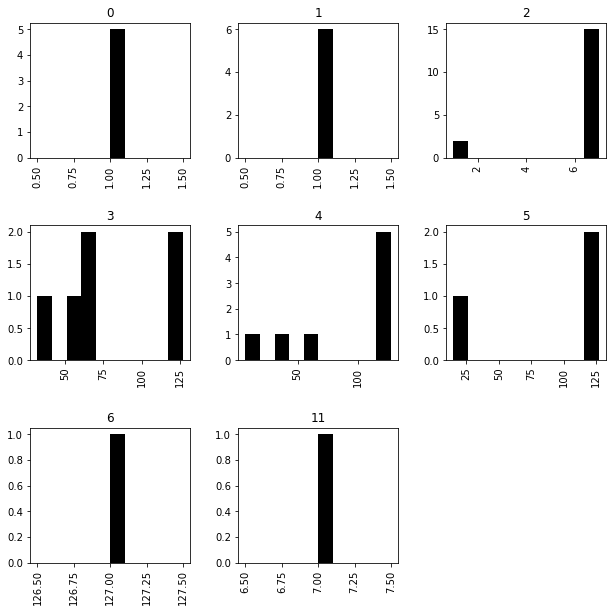

In [13]:
hist = temp.hist("Equivs_len", by = "In_degree", figsize = (10,10), color = "black")

### Make/visualize networks with minimal rules, random rules, pre-specified text file of rules